<a href="https://colab.research.google.com/github/gauravmalakar08/Used_Car_Price_Predictor/blob/main/Used_Car_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics 


import datetime

#ignore the warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Importing the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data
df_car = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Car Price Predictor/car details v4.csv")

In [40]:
#copying data to preserve orignal file
df = df_car.copy()

In [41]:
#initial check of the data
df.head().style.background_gradient(cmap = "autumn")

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.000000,1680.000000,1505.000000,5.000000,35.000000
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.000000,1695.000000,1555.000000,5.000000,42.000000
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.000000,1595.000000,1550.000000,5.000000,35.000000
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.000000,1745.000000,1510.000000,5.000000,37.000000
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.000000,1830.000000,1795.000000,7.000000,55.000000


In [42]:
#initial check of the column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [43]:
#get the shape of the data
df.shape

(2059, 20)

In [44]:
#get the summary staticstis of the data
df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
Price,2059.000000,1702991.696455,2419880.635434,49000.000000,484999.000000,825000.000000,1925000.000000,35000000.000000
Year,2059.000000,2016.425449,3.363564,1988.000000,2014.000000,2017.000000,2019.000000,2022.000000
Kilometer,2059.000000,54224.714424,57361.721314,0.000000,29000.000000,50000.000000,72000.000000,2000000.000000
Length,1995.000000,4280.860652,442.458507,3099.000000,3985.000000,4370.000000,4629.000000,5569.000000
Width,1995.000000,1767.991980,135.265825,1475.000000,1695.000000,1770.000000,1831.500000,2220.000000
Height,1995.000000,1591.735338,136.073956,1165.000000,1485.000000,1545.000000,1675.000000,1995.000000
Seating Capacity,1995.000000,5.306266,0.822170,2.000000,5.000000,5.000000,5.000000,8.000000
Fuel Tank Capacity,1946.000000,52.002210,15.110198,15.000000,41.250000,50.000000,60.000000,105.000000


In [66]:
df[df['Price'] == 35000000]

,Make,Car Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type
483,Ferrari,488,35000000,2018,9500,Petrol,Automatic,Delhi,Black,First,Individual


In [45]:
#converting the datatype of the year column
df['Year'] = pd.DatetimeIndex(pd.to_datetime(df['Year'], format='%Y')).year


In [46]:
#dropping the unnesseary colums for now
columns_to_drop = ['Engine','Max Power','Max Torque','Drivetrain','Length','Width','Height','Seating Capacity','Fuel Tank Capacity']

# Drop the columns
df = df.drop(columns=columns_to_drop)

In [47]:
#checking the shape of the data
df.shape

(2059, 11)

In [48]:
#extracting the proper model name of the particular car (removing the varient names)
df['Car Model'] = df['Model'].str.extract(r'(\S{3,}|\S{1,2}\s+\S+)', expand=False)

In [49]:
# Reordering the dataset
new_column_order = ['index', 'Make', 'Model', 'Car Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type']
df = df.reindex(columns=new_column_order)


In [50]:
#dropping the column Model and index
df = df.drop(columns=["Model"])
df = df.drop('index',axis=1)

In [51]:
#cheking the datatypes of the colums
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          2059 non-null   object
 1   Car Model     2059 non-null   object
 2   Price         2059 non-null   int64 
 3   Year          2059 non-null   int64 
 4   Kilometer     2059 non-null   int64 
 5   Fuel Type     2059 non-null   object
 6   Transmission  2059 non-null   object
 7   Location      2059 non-null   object
 8   Color         2059 non-null   object
 9   Owner         2059 non-null   object
 10  Seller Type   2059 non-null   object
dtypes: int64(3), object(8)
memory usage: 177.1+ KB


In [52]:
#checking the null values
df.isna().sum()

Make            0
Car Model       0
Price           0
Year            0
Kilometer       0
Fuel Type       0
Transmission    0
Location        0
Color           0
Owner           0
Seller Type     0
dtype: int64

In [53]:
 #checking the distribution of categorical data
print(df['Fuel Type'].value_counts())
print('\n\n',df['Seller Type'].value_counts())
print('\n\n',df['Transmission'].value_counts())

Diesel          1049
Petrol           942
CNG               50
Electric           7
LPG                5
Hybrid             3
CNG + CNG          1
Petrol + CNG       1
Petrol + LPG       1
Name: Fuel Type, dtype: int64


 Individual                 1997
Corporate                    57
Commercial Registration       5
Name: Seller Type, dtype: int64


 Manual       1133
Automatic     926
Name: Transmission, dtype: int64


####**Univariate Analysis Of Each Categorical Values**

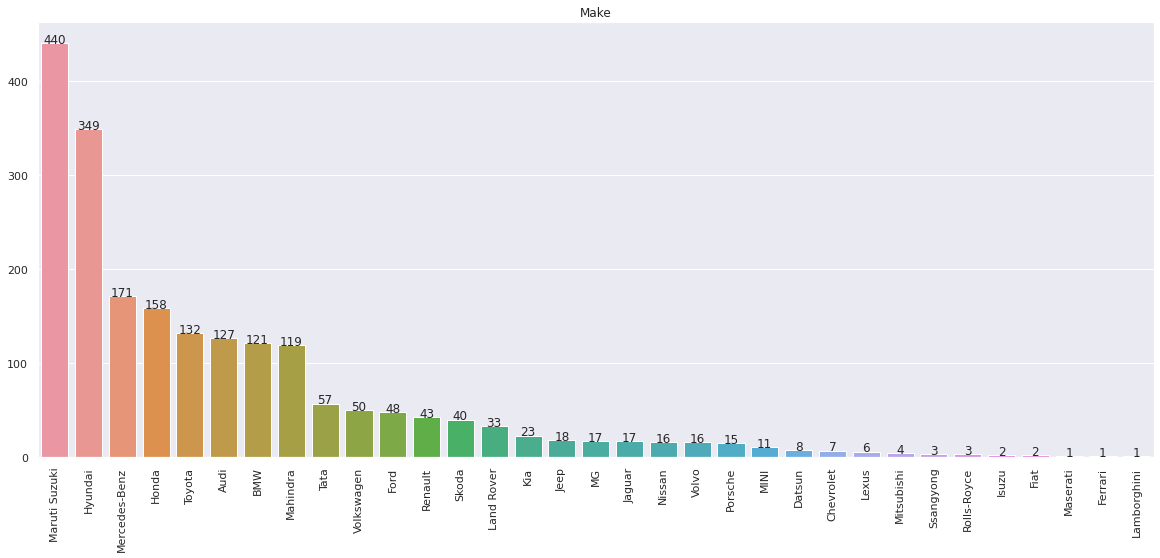

In [54]:
sns.set(rc={'figure.figsize':(20,8)})
make_count = df['Make'].value_counts().sort_values(ascending=False)
sns.barplot(x=make_count.index, y=make_count.values)
for i in range(len(make_count)):
    plt.annotate(make_count.values[i], (i, make_count.values[i]), ha='center')

plt.title('Make')
plt.xticks(rotation=90)
plt.show()


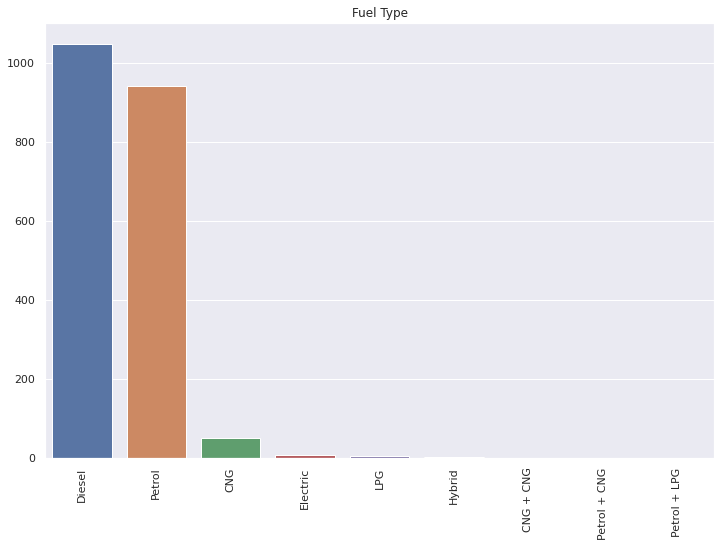

In [55]:
sns.set(rc={'figure.figsize':(12,8)})
fuel_count = df['Fuel Type'].value_counts().sort_values(ascending=False)
sns.barplot(x=fuel_count.index, y=fuel_count.values)
plt.title('Fuel Type')
plt.xticks(rotation=90)
plt.show()



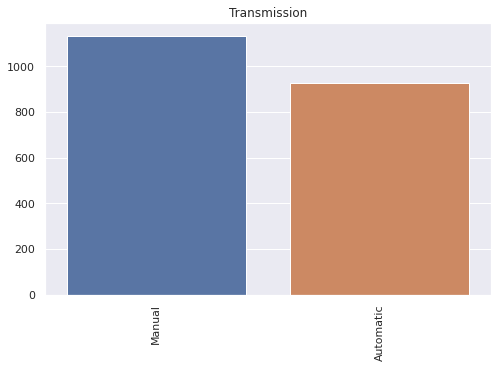

In [56]:
sns.set(rc={'figure.figsize':(8,5)})
trans_count = df['Transmission'].value_counts().sort_values(ascending=False)
sns.barplot(x=trans_count.index, y=trans_count.values)
plt.title('Transmission')
plt.xticks(rotation=90)
plt.show()

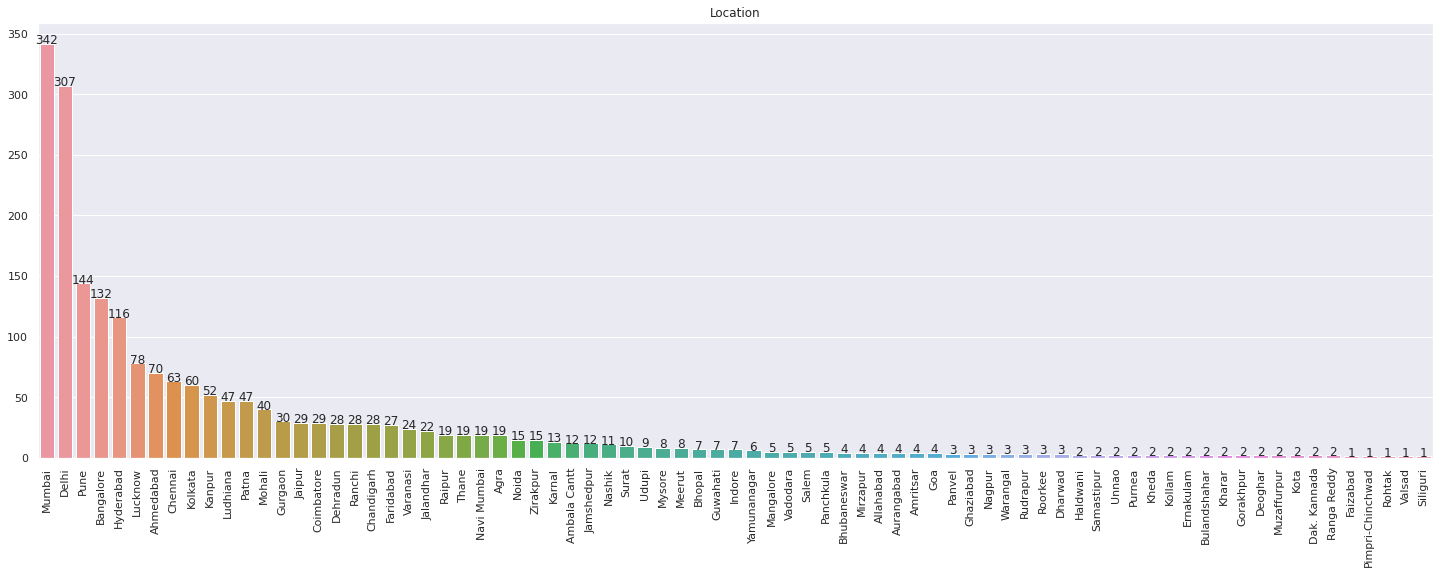

In [57]:
sns.set(rc={'figure.figsize':(25,8)})

loc_count = df['Location'].value_counts().sort_values(ascending=False)
sns.barplot(x=loc_count.index, y=loc_count.values)
for i in range(len(loc_count)):
    plt.annotate(loc_count.values[i], (i, loc_count.values[i]), ha='center')
plt.title('Location')
plt.xticks(rotation=90)
plt.show()

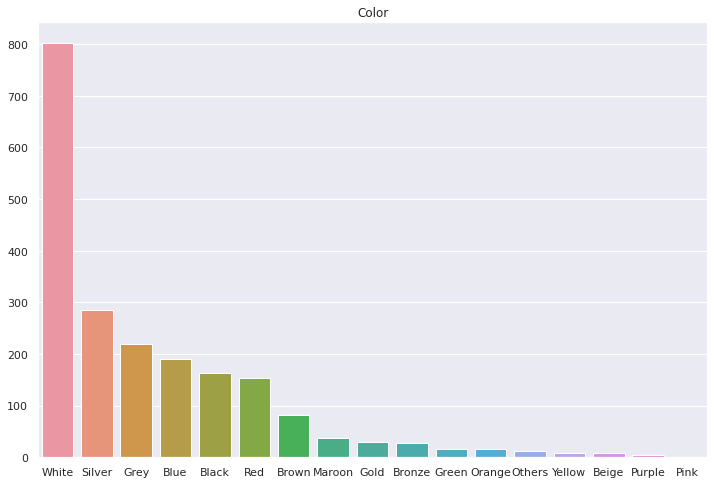

In [58]:
sns.set(rc={'figure.figsize':(12,8)})

col_count = df['Color'].value_counts().sort_values(ascending=False)
sns.barplot(x=col_count.index, y=col_count.values)


plt.title('Color')
plt.show()

In [59]:
#just copying the dataframe to new variable
df1 = df.copy()

####**Encoding The Categorical Columns**

In [60]:

#Fuel Column
fuel_type_mapping = {'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'Electric': 3, 'LPG': 4, 'Hybrid': 5, 'CNG + CNG': 6, 'Petrol + CNG': 7, 'Petrol + LPG': 8}
df1['Fuel Type'] = df1['Fuel Type'].replace(fuel_type_mapping)
#Seller Type
df1['Seller Type'] = df1['Seller Type'].replace({'Individual':1, 'Corporate':2, 'Commercial Registration':3})
#Transmission
df1['Transmission'] = df1['Transmission'].replace({'Manual':1, 'Automatic':2})
#Owner
df1['Owner'] = df1['Owner'].replace({'First':1, 'Second':2, 'Third':3, 'Fourth':4, 'UnRegistered Car':5, '4 or More':6})

####**Splitting the data into train and test**